# Australian Open 2020: Winner Predictor
## Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
#### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from time import time

In [2]:
data_types = {
    'ATP': int,
    'Location': object,
    'Tournament': object,
    'Series': object,
    'Court': object,
    'Surface': object,
    'Round': object,
    'Best of': int,
    'Winner': object,
    'Loser': object,
    'WRank': float,
    'LRank': float,
    'WPts': float,
    'LPts': float,
    'W1': float,
    'L1': float,
    'W2': float,
    'L2': float,
    'W3': float,
    'L3': float,
    'W4': float,
    'L4': float,
    'W5': float,
    'L5': float,
    'Wsets': float,
    'Lsets': float,
    'Comment': object,
    'B365W': float,
    'B365L': float,
    'EXW': object,
    'EXL': float,
    'LBW': float,
    'LBL': float,
    'PSW': float,
    'PSL': float,
    'SJW': float,
    'SJL': float,
    'MaxW': float,
    'MaxL': float,
    'AvgW': float,
    'AvgL': float,
    'WElo': float,
    'WSurfElo': float,
    'WHand': object,
    'WBHand': float,
    'LElo': float,
    'LSurfElo': float,
    'LHand': object,
    'LBHand': float
}
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=data_types,
                            parse_dates=['Date', 'WBD', 'LBD'])

In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,WElo,WSurfElo,WBD,WHand,WBHand,LElo,LSurfElo,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1783.4,1724.7,NaT,NaN,NaN,NaN,NaN,1984-03-24,R,1.0
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,1610.9,1611.0,1986-09-07,R,2.0,NaN,NaN,1974-05-05,L,2.0
2,2,Chennai,Chennai Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Kendrick R.,...,NaN,NaN,1979-11-15,R,2.0,NaN,NaN,1981-08-16,L,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,NaN,NaN,1987-02-10,R,2.0,NaN,NaN,1985-08-07,R,2.0
4,1,Brisbane,Brisbane International,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Roddick A.,...,NaN,NaN,1982-08-30,R,2.0,NaN,NaN,1985-08-08,R,2.0


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 52 columns):
ATP           23634 non-null int32
Location      23634 non-null object
Tournament    23634 non-null object
Date          23634 non-null datetime64[ns]
Series        23634 non-null object
Court         23634 non-null object
Surface       23634 non-null object
Round         23634 non-null object
Best of       23634 non-null int32
Winner        23634 non-null object
Loser         23634 non-null object
WRank         23624 non-null float64
LRank         23586 non-null float64
WPts          23626 non-null float64
LPts          23587 non-null float64
W1            23483 non-null float64
L1            23485 non-null float64
W2            23260 non-null float64
L2            23260 non-null float64
W3            11173 non-null float64
L3            11173 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23634.0,33.036896,18.040228,1.000,19.00,33.00,49.00,67.00
Best of,23634.0,3.386139,0.789431,3.000,3.00,3.00,3.00,5.00
WRank,23624.0,56.754614,70.940513,1.000,16.00,40.00,74.00,1890.00
LRank,23586.0,87.187908,109.198180,1.000,34.00,62.00,100.00,2159.00
WPts,23626.0,1988.829002,2477.960179,1.000,693.00,1060.00,2030.00,16950.00
LPts,23587.0,1127.641497,1294.122302,1.000,557.00,788.00,1195.00,16950.00
W1,23483.0,5.806583,1.225518,0.000,6.00,6.00,6.00,7.00
L1,23485.0,4.105770,1.834737,0.000,3.00,4.00,6.00,7.00
W2,23260.0,5.784007,1.246084,0.000,6.00,6.00,6.00,7.00
L2,23260.0,3.952193,1.857456,0.000,3.00,4.00,6.00,7.00


In [6]:
def compute_elo_rankings(data):
    """
    Given the list on matches in chronological order, for each match, computes 
    the elo ranking of the 2 players at the beginning of the match
    """
    print("Elo rankings computing...")
    players=list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo=pd.Series(np.ones(len(players))*1500,index=players)
    ranking_elo=[(1500,1500)]
    for i in range(1,len(data)):
        w=data.iloc[i-1,:].Winner
        l=data.iloc[i-1,:].Loser
        elow=elo[w]
        elol=elo[l]
        pwin=1 / (1 + 10 ** ((elol - elow) / 400))    
        K_win=32
        K_los=32
        new_elow=elow+K_win*(1-pwin)
        new_elol=elol-K_los*(1-pwin)
        elo[w]=new_elow
        elo[l]=new_elol
        ranking_elo.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
    ranking_elo=pd.DataFrame(ranking_elo,columns=["elo_winner","elo_loser"])    
    ranking_elo["proba_elo"]=1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))   
    return ranking_elo

In [7]:
def preprocess_data(min_date=2011,
                    max_date=2019,
                    features_to_drop=[], 
                    missing_values="drop", 
                    drop_first=False):
    """
    Processes raw data and returns a tuple (X, Y) where X is the cleaned dataset and Y is the array of labels.
    """
    # Loads data for the given years
    if max_date > 2019 or min_date < 2011:
        raise ValueError("Wrong date parameter")
    df = pd.read_csv("data/" + str(min_date) + ".csv", encoding='utf-8-sig', dtype=data_types)
    for year in range (min_date + 1, max_date + 1):
        filename = "data/" + str(year) + ".csv"
        df = pd.concat((df, pd.read_csv(filename, encoding='utf-8-sig', dtype=data_types)))
    
    # Sort by date to calculate ELO
    X = df.sort_values(by='Date')
    
    # Drop unuseful columns
    features_to_drop += ['ATP', 'Location', 'Tournament', 'Date', 'Comment', 
                         'Winner', 'Loser', 'Wsets', 'Lsets', 
                         'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 
                         'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW', 'PSL', 'SJW', 'SJL',
                         'WBD', 'LBD']
    X = X.drop(columns=features_to_drop)
    
    # Deal with missing values
    X['WRank'] = X['WRank'].fillna(value=X['WRank'].max()+100).astype(int)
    X['LRank'] = X['LRank'].fillna(value=X['LRank'].max()+100).astype(int)

    if missing_values == 'drop':
        X = X.dropna()
    elif missing_values == 'custom':
        pass
    else:
        raise ValueError('Wrong parameter: missing_values')

    # Convert ordinal features to int (higher value means more important)
    series = ['ATP250', 'ATP500', 'Masters 1000', 'Masters Cup', 'Grand Slam']
    series2int = {s: i for i, s in enumerate(series)}
    rounds2int = {'1st Round': 0,
                  '2nd Round': 1,
                  '3rd Round': 2,
                  '4th Round': 3,
                  'Round Robin': 4,
                  'Quarterfinals': 5,
                  'Semifinals': 6,
                  'The Final': 7,
                 }
    X = X.replace({'Round': rounds2int, 'Series': series2int})
    
    # Convert categorical (binary) fields to int
    X = X.replace({'Court': {'Outdoor': 0, 'Indoor': 1}, 
                   'WHand': {'R': 0, 'L': 1}, 
                   'LHand': {'R': 0, 'L': 1}})
    X.astype({'WBHand': int, 'LBHand': int})
    
    # One hot encode categorical features into binary features
    X = pd.get_dummies(X, prefix=['Surface_'], columns=['Surface'], drop_first=drop_first)
    
    # Generate labels
    Y = np.concatenate([np.ones(X.shape[0], dtype=int), np.zeros(X.shape[0], dtype=int)])
    
    # Duplicate data with swapped columns
    tmp = X.copy()
    cols_to_swap = ['WRank', 'LRank', 'MaxW', 'MaxL',  'AvgW',  'AvgL', 'WPts', 'LPts',
                    'WElo', 'LElo', 'WSurfElo', 'LSurfElo', 'WHand', 'LHand', 'WBHand', 'LBHand']
    cols_to_swap = [f for f in cols_to_swap if f not in features_to_drop]
    cols_swapped = ['LRank', 'WRank', 'MaxL', 'MaxW',  'AvgL',  'AvgW', 'LPts', 'WPts',
                    'LElo', 'WElo', 'LSurfElo', 'WSurfElo', 'LHand', 'WHand', 'LBHand', 'WBHand']
    cols_swapped = [f for f in cols_swapped if f not in features_to_drop]
    
    tmp[cols_to_swap] = tmp[cols_swapped]
    tmp.index = np.array(range(X.shape[0] + 1, X.shape[0] * 2 + 1))
    X = pd.concat((X, tmp))
    
    # Generate new columns
    X['GreaterRank'] = (X['WRank'] < X['LRank']).astype(int)
    
    # Rename columns
    X = X.rename(columns={'WRank':'P1Rank', 'LRank':'P2Rank', 
                          'MaxW':'MaxP1', 'MaxL':'MaxP2', 
                          'AvgW':'AvgP1', 'AvgL':'AvgP2'})
    return X, Y

In [8]:
X, Y = preprocess_data(min_date=2014,
                       features_to_drop=[])

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13514 entries, 0 to 13514
Data columns (total 24 columns):
Series            13514 non-null int64
Court             13514 non-null int64
Round             13514 non-null int64
Best of           13514 non-null int32
P1Rank            13514 non-null int32
P2Rank            13514 non-null int32
WPts              13514 non-null float64
LPts              13514 non-null float64
MaxP1             13514 non-null float64
MaxP2             13514 non-null float64
AvgP1             13514 non-null float64
AvgP2             13514 non-null float64
WElo              13514 non-null float64
WSurfElo          13514 non-null float64
WHand             13514 non-null int64
WBHand            13514 non-null float64
LElo              13514 non-null float64
LSurfElo          13514 non-null float64
LHand             13514 non-null int64
LBHand            13514 non-null float64
Surface__Clay     13514 non-null uint8
Surface__Grass    13514 non-null uint8
Surface__

In [10]:
X.head()

,Series,Court,Round,Best of,P1Rank,P2Rank,WPts,LPts,MaxP1,MaxP2,...,WHand,WBHand,LElo,LSurfElo,LHand,LBHand,Surface__Clay,Surface__Grass,Surface__Hard,GreaterRank
0,0,0,1,3,31,9,1230.0,3300.0,1.66,2.54,...,0,2.0,1793.3,1730.5,0,1.0,0,0,1,0
11,0,0,1,3,17,68,1915.0,706.0,1.44,3.50,...,0,2.0,1641.9,1598.2,0,2.0,0,0,1,1
10,0,0,1,3,37,23,1130.0,1520.0,2.56,1.67,...,0,2.0,1837.8,1805.7,0,1.0,0,0,1,0
3,0,0,1,3,1,74,13030.0,663.0,1.06,17.50,...,1,2.0,1532.0,1508.0,0,2.0,0,0,1,1
7,0,0,1,3,162,22,321.0,1525.0,4.30,1.27,...,0,2.0,1789.2,1763.2,0,1.0,0,0,1,0


In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,13514.0,1.477135,1.505004,0.00,0.00,1.00,2.00,4.00
Court,13514.0,0.178778,0.383180,0.00,0.00,0.00,0.00,1.00
Round,13514.0,1.681663,2.160929,0.00,0.00,1.00,2.00,7.00
Best of,13514.0,3.408761,0.806526,3.00,3.00,3.00,3.00,5.00
P1Rank,13514.0,63.044176,77.084345,1.00,20.00,46.00,82.00,1821.00
P2Rank,13514.0,63.044176,77.084345,1.00,20.00,46.00,82.00,1821.00
WPts,13514.0,1807.103152,2323.210849,1.00,663.00,995.00,1770.00,16950.00
LPts,13514.0,1807.103152,2323.210849,1.00,663.00,995.00,1770.00,16950.00
MaxP1,13514.0,6.280736,362.458932,1.01,1.46,2.00,3.16,42136.00
MaxP2,13514.0,6.280736,362.458932,1.01,1.46,2.00,3.16,42136.00


Models construction

In [12]:
def timeit(fun):
    # This is a decorator function used to log the model construction execution time
    def timed(*args, **kwargs):
        start = time()
        result = fun(*args, **kwargs)
        end = time()
        print('Execution took {:.2f} min'.format((end-start)/60))
        return result
    return timed

In [13]:
def baseline_model(X, Y):
    # This model will always predict the winner as the player with the highest rank.
    # It's the lower bound on accuracy that we wish to improve
    y_pred = (X['P1Rank'] > X['P2Rank']).astype(int)
    accuracy = round((y_pred == Y).sum()/len(Y), 2)
    return accuracy
    
print('Accuracy for the baseline model is:', baseline_model(X, Y))

Accuracy for the baseline model is: 0.34


In [24]:
@timeit
def build_decision_tree(X_train, Y_train, X_valid, Y_valid, draw_graphs=True, draw_tree=False):
    from sklearn.tree import DecisionTreeClassifier, export_graphviz
    # Builds a decision tree and performs hyper-parameters tuning
    scores = {}
    criterions = ('gini', 'entropy')
    splitters = ("best", "random")
    depths = list(range(3, 100, 10)) + [None]
    leaves = list(range(10, 201, 30)) + [None]
    for criterion in criterions:
        for splitter in splitters:
            for depth in depths:
                for max_leaves in leaves:
                    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves,
                                                splitter=splitter,
                                                criterion=criterion,
                                                max_depth=depth)
                    dt.fit(X_train, Y_train)
                    train_acc = round(accuracy_score(y_true=Y_train, y_pred=dt.predict(X_train)), 3)
                    valid_acc = round(accuracy_score(y_true=Y_valid, y_pred=dt.predict(X_valid)), 3)
                    scores[(depth, max_leaves, criterion, splitter)] = (valid_acc, train_acc)
                    
    best_acc = max(scores.values())
    best_params = [params for params, acc in scores.items() if acc == best_acc][0]
    depth, max_leaves, criterion, splitter = best_params
    print('Max accuracy on validation set:', best_acc[0])
    print('Criterion:', criterion)
    print('Splitter:', splitter)
    print('Max depth:', depth)
    print('Max leaves:', max_leaves)
    
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves,
                                splitter=splitter,
                                criterion=criterion,
                                max_depth=depth)
    dt.fit(pd.concat([X_train, X_valid]), np.concatenate([Y_train, Y_valid]))
    
    if draw_graphs:
        fig, (leaves_ax, depth_ax) = plt.subplots(1, 2)
        # plotting acc graph for max_leaves hyperparameter
        errors = []
        for tmp_leaves in leaves:
            valid_acc, train_acc = scores[(depth, tmp_leaves, criterion, splitter)]
            errors += [ [tmp_leaves, valid_acc, train_acc] ]
        errors = np.array(errors)
        leaves_ax.plot(errors[:,0], errors[:,1], "x:", label="Validation")
        leaves_ax.plot(errors[:,0], errors[:,2], "o-", label="Train")
        leaves_ax.set_ylabel("Accuracy")
        leaves_ax.set_xlabel("Number of Leaves")
        leaves_ax.grid()
        leaves_ax.legend()
        
        # plotting acc graph for max_depth hyperparameter
        errors = []
        for tmp_depth in depths:
            valid_acc, train_acc = scores[(tmp_depth, max_leaves, criterion, splitter)]
            errors += [ [tmp_leaves, valid_acc, train_acc] ]
        errors = np.array(errors)
        depth_ax.plot(errors[:,0], errors[:,1], "x:", label="Validation")
        depth_ax.plot(errors[:,0], errors[:,2], "o-", label="Train")
        depth_ax.set_ylabel("Accuracy")
        depth_ax.set_xlabel("Max tree depth")
        depth_ax.grid()
        depth_ax.legend()
    if draw_tree:
        dot_data = export_graphviz(dt, out_file=None, 
                                   feature_names=X_train.columns, class_names=True,
                                   filled=True, rounded=True, special_characters=True)  
        graph = graphviz.Source(dot_data)
        display(graph)
    return dt, best_params

In [15]:
@timeit
def build_bagging_classifier(X_train, Y_train, X_valid, Y_valid, draw_graphs=True):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import BaggingClassifier
    scores = []
    for bootstrap in (True, False):
        for n_est in range(10, 201, 20):
            for max_samples in (0.25, 0.50, 0.75, 1.0):
                for criterion in ('gini', 'entropy'):
                    dt = DecisionTreeClassifier(criterion=criterion)
                    bagged_dt = BaggingClassifier(dt, bootstrap=bootstrap,
                                                  n_estimators=n_est,
                                                  max_samples=max_samples,
                                                  n_jobs=-1)
                    bagged_dt.fit(X_train, Y_train)
                    valid_acc = round(accuracy_score(y_true=Y_valid, y_pred=bagged_dt.predict(X_valid)), 3)
                    scores += [(valid_acc, bootstrap, n_est, max_samples, criterion)]
    best = max(scores)
    acc, bootstrap, n_est, max_samples, criterion = best
    print('Max accuracy on validation set:', acc)
    print('Boostrap:', bootstrap)
    print('N. estimators:', n_est)
    print('Max samples:', max_samples)
    print('Tree criterion:', criterion)
    bagged_dt = BaggingClassifier(dt, 
                                  bootstrap=bootstrap,
                                  n_estimators=n_est, 
                                  max_samples=max_samples)
    bagged_dt.fit(pd.concat([X_train, X_valid]), np.concatenate([Y_train, Y_valid]))
    return bagged_dt, best

In [16]:
@timeit
def build_adaboost(X_train, Y_train, X_valid, Y_valid, draw_graphs=True):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier
    scores = []
    for n_est in range(50, 501, 50):
        for learning_rate in (0.50, 0.75, 1.0, 1.5):
            for criterion in ('gini', 'entropy'):
                for depth in range(3, 10):
                    #for leaves in range(5, 100, 25):
                    dt = DecisionTreeClassifier(#max_leaf_nodes=leaves,
                                                criterion=criterion,
                                                max_depth=depth)
                    boosted_dt = AdaBoostClassifier(dt,
                                                    n_estimators=n_est,
                                                    learning_rate=learning_rate)
                    boosted_dt.fit(X_train, Y_train)
                    valid_acc = round(accuracy_score(y_true=Y_valid, y_pred=bagged_dt.predict(X_valid)), 3)
                    scores += [(valid_acc, n_est, learning_rate, criterion, depth)]
    best = max(scores)
    acc, n_est, learning_rate, criterion, depth = best
    print('Max accuracy on validation set:', acc)
    print('N. estimators:', n_est)
    print('Learning rate:', learning_rate)
    #print('Tree max leaves:', leaves)
    print('Tree max depth:', depth)
    print('Tree criterion:', criterion)
    dt = DecisionTreeClassifier(#max_leaf_nodes=leaves,
                                criterion=criterion,
                                max_depth=depth)
    boosted_dt = AdaBoostClassifier(dt,
                                    n_estimators=n_est,
                                    learning_rate=learning_rate)
    boosted_dt.fit(pd.concat([X_train, X_valid]), np.concatenate([Y_train, Y_valid]))
    return boosted_dt, best

In [33]:
@timeit
def build_random_forest(X_train, Y_train, X_valid, Y_valid, draw_graphs=True):
    from sklearn.ensemble import RandomForestClassifier
    scores = {}
    for n_est in range(50, 501, 50):
        for criterion in ('gini', 'entropy'):
            for bootstrap in (True, False):
                for n_features in (None, 'sqrt', 'log2'):
                    rf = RandomForestClassifier(n_estimators=n_est,
                                                bootstrap=bootstrap,
                                                criterion=criterion,
                                                max_features=n_features,
                                                n_jobs=-1)
                    rf.fit(X_train, Y_train)
                    train_acc = round(accuracy_score(y_true=Y_train, y_pred=dt.predict(X_train)), 3)
                    valid_acc = round(accuracy_score(y_true=Y_valid, y_pred=dt.predict(X_valid)), 3)
                    scores[(n_est, criterion, bootstrap, n_features)] = (valid_acc, train_acc)
                    
    best_acc = max(scores.values())
    best_params = [params for params, acc in scores.items() if acc == best_acc][0]
    n_est, criterion, bootstrap, n_features = best_params
    print('Max accuracy on validation set:', best_acc[0])
    print('N. estimators:', n_est)
    print('Criterion:', criterion)
    print('Bootstrap:', bootstrap)
    print('Features criterion (None means all features):', n_features)
    rf = RandomForestClassifier(n_estimators=n_est,
                               bootstrap=bootstrap,
                               criterion=criterion,
                               n_jobs=-1)
    rf.fit(pd.concat([X_train, X_valid]), np.concatenate([Y_train, Y_valid]))
    return rf, best_params

Let's split the data into train set, validation set and test set

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25)

Max accuracy on validation set: (0.711, 0.706)
Criterion: gini
Splitter: random
Max depth: 13
Max leaves: 40


<IPython.core.display.Javascript object>


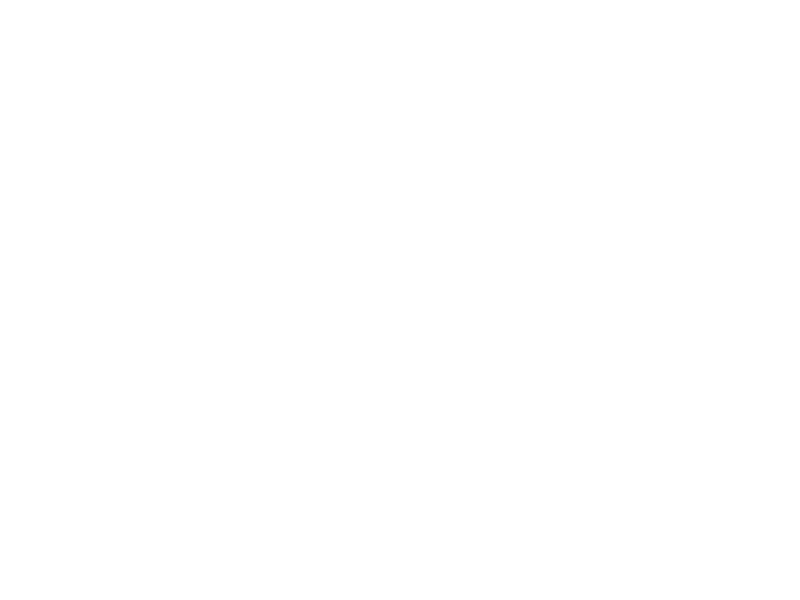

Execution took 0.21 min


In [19]:
dt, dt_params = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

In [20]:
bagged_dt, bagged_params = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

Max accuracy on validation set: 0.714
Boostrap: True
N. estimators: 190
Max samples: 0.25
Tree criterion: gini
Execution took 2.86 min


In [21]:
boosted_dt, boosted_params = build_adaboost(X_train, Y_train, X_valid, Y_valid)

Max accuracy on validation set: 0.885
N. estimators: 500
Learning rate: 1.5
Tree max depth: 9
Tree criterion: gini
Execution took 92.81 min


In [34]:
rf, rf_params = build_random_forest(X_train, Y_train, X_valid, Y_valid)

Max accuracy on validation set: 0.716
N. estimators: 50
Criterion: gini
Bootstrap: True
Features criterion (None means all features): None
Execution took 4.08 min


In [35]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt), 
          ('AdaBoost', boosted_dt), 
          ('Random Forest', rf)]

In [36]:
def feature_importance_rf(X, rf):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.bar(range(0,X.shape[1]), rf.feature_importances_)
    ax.set_title("Feature Importances")
    for i, f in enumerate(rf.feature_importances_):
        print('{:2}'.format(i), ' -> ', X.columns[i])

In [37]:
def model_decision_boundary(models, X, y):
    print('Approximate decision boundaries for the different models')
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(X)
    X_proj = pca.transform(X)
    
    x_min, x_max = X_proj[:, 0].min() - .1, X_proj[:, 0].max() + .1
    y_min, y_max = X_proj[:, 1].min() - .1, X_proj[:, 1].max() + .1
    zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 50) 
                   for yy in np.linspace(y_min, y_max, 50) ]
    zz = np.array(zz)
    fig, ax_lst = plt.subplots(2, 2, figsize=(7,7))
    
    for model, ax in zip(models, ax_lst.flatten()):
        algo, model = model
        z_labels = model.predict(pca.inverse_transform(zz))
        ax.scatter(zz[:,0], zz[:,1], c=z_labels, marker='+', alpha=0.3)
        ax.scatter(X_proj[:,0], X_proj[:,1], c=y, alpha=0.5)
        ax.set_title(algo)

Approximate decision boundaries for the different models


<IPython.core.display.Javascript object>


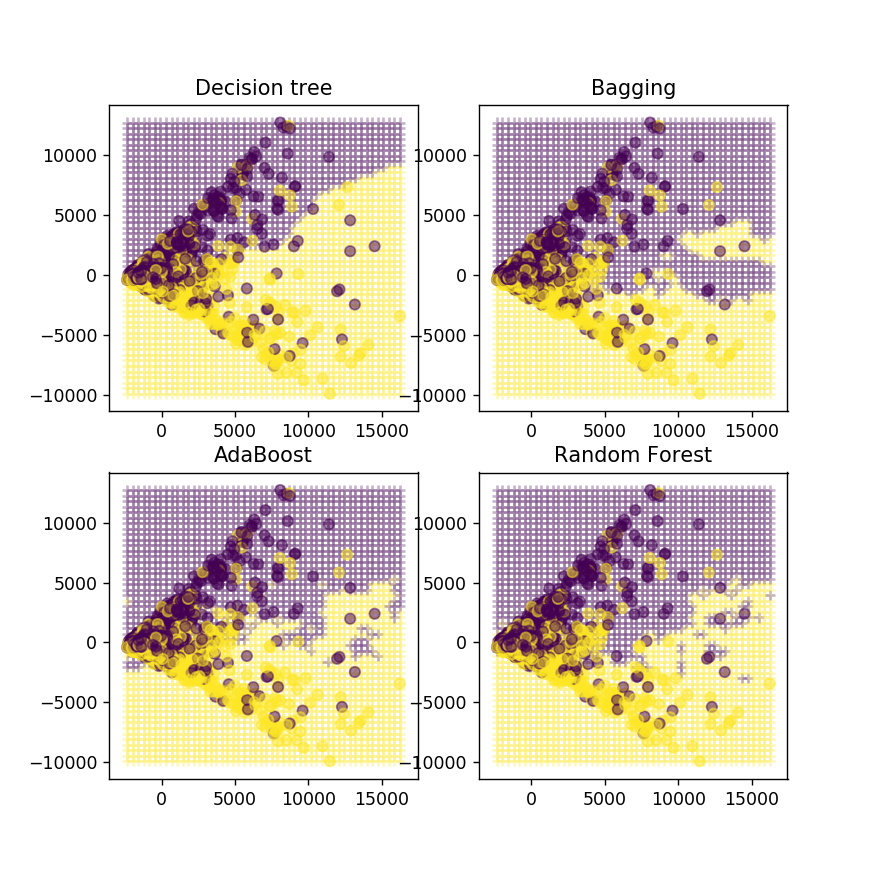

In [42]:
model_decision_boundary(models, X_test, Y_test)

<IPython.core.display.Javascript object>


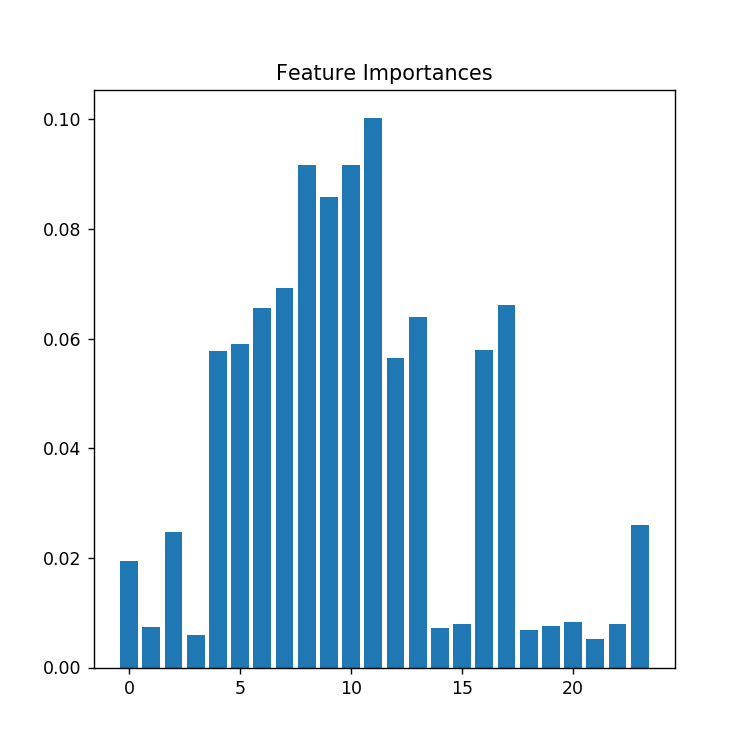

 0  ->  Series
 1  ->  Court
 2  ->  Round
 3  ->  Best of
 4  ->  P1Rank
 5  ->  P2Rank
 6  ->  WPts
 7  ->  LPts
 8  ->  MaxP1
 9  ->  MaxP2
10  ->  AvgP1
11  ->  AvgP2
12  ->  WElo
13  ->  WSurfElo
14  ->  WHand
15  ->  WBHand
16  ->  LElo
17  ->  LSurfElo
18  ->  LHand
19  ->  LBHand
20  ->  Surface__Clay
21  ->  Surface__Grass
22  ->  Surface__Hard
23  ->  GreaterRank


In [39]:
feature_importance_rf(X_train, rf)

In [40]:
def report(X, Y, models):
    for model in models:
        print('Algorithm:', str(type(model)).split('.')[-1][:-2])
        rep = classification_report(y_true=Y, y_pred=model.predict(X))
        print(rep)
        print()

In [41]:
report(X_test, Y_test, [dt, bagged_dt, boosted_dt, rf])

Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1369
           1       0.69      0.68      0.68      1334

    accuracy                           0.69      2703
   macro avg       0.69      0.69      0.69      2703
weighted avg       0.69      0.69      0.69      2703


Algorithm: BaggingClassifier
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1369
           1       0.68      0.70      0.69      1334

    accuracy                           0.69      2703
   macro avg       0.69      0.69      0.69      2703
weighted avg       0.69      0.69      0.69      2703


Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      1369
           1       0.65      0.67      0.66      1334

    accuracy                           0.66      2703
   macro avg       0.66      0.66